# ● Model Building and saving the model using Pickle

### 1. Import required libraries and read the dataset. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('loan_approval_data.csv')


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. 

In [3]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. 

In [6]:
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [7]:
missing_values = df.isnull().sum()/len(df)

## These are the index of both categorical columns as well as numerical columns having null values.
index = [i  for i in missing_values[missing_values>0].index]

## separating numerical columns and categorical columns
numerical_columns = [i     for i in index      if i in df.columns and  df[i].dtype!=object]
categorical_columns = [i     for i in index      if i in df.columns and  df[i].dtype==object]

## Filling the null values of the numerical columns with median computation.
for columns in numerical_columns:
    df[columns]=df[columns].fillna(df[columns].median())
    
## Filling the null values of the categorical columns with mode computation.
for columns in categorical_columns:
    df[columns]=df[columns].fillna(df[columns].mode()[0])

In [8]:
df.drop(['loan_id'],axis=1,inplace=True)

In [9]:
df.isnull().sum()/len(df)*100

gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. 

In [10]:
df.select_dtypes('object').columns

Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

loan_status    n    y
gender               
female        37   75
male         155  347


<AxesSubplot:xlabel='gender'>

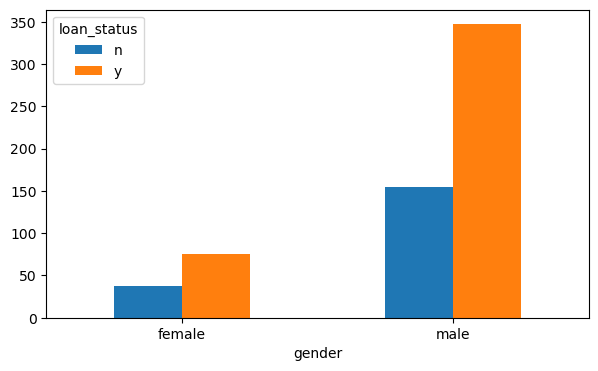

In [11]:

CrosstabResult=pd.crosstab(index=df['gender'],columns=df['loan_status'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

loan_status    n    y
married              
no            79  134
yes          113  288


<AxesSubplot:xlabel='married'>

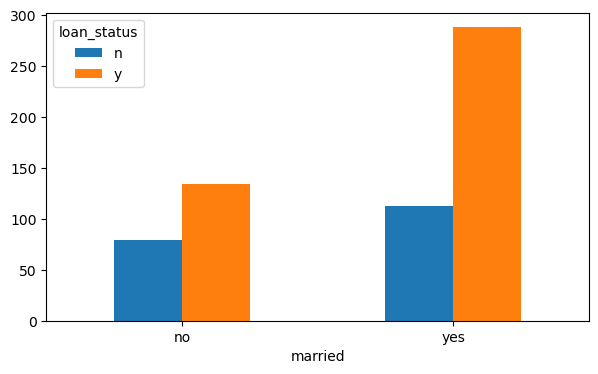

In [12]:
CrosstabResult=pd.crosstab(index=df['married'],columns=df['loan_status'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

loan_status     n    y
education             
graduate      140  340
not graduate   52   82


<AxesSubplot:xlabel='education'>

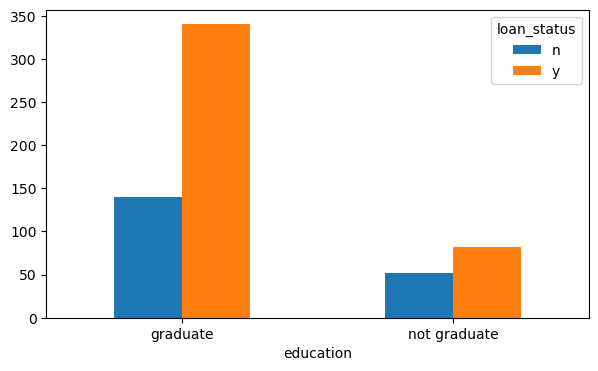

In [13]:
CrosstabResult=pd.crosstab(index=df[ 'education'],columns=df['loan_status'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

loan_status      n    y
self_employed          
no             166  366
yes             26   56


<AxesSubplot:xlabel='self_employed'>

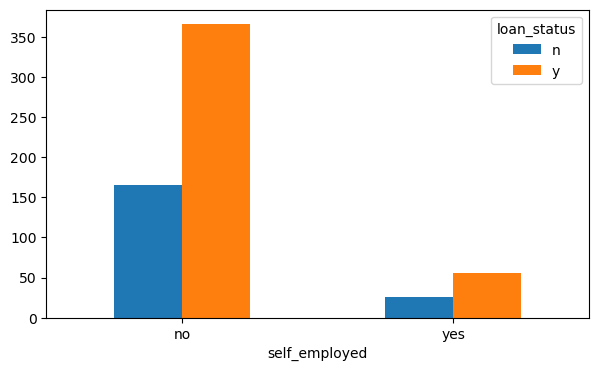

In [14]:
CrosstabResult=pd.crosstab(index=df['self_employed'],columns=df['loan_status'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

loan_status     n    y
property_area         
rural          69  110
semiurban      54  179
urban          69  133


<AxesSubplot:xlabel='property_area'>

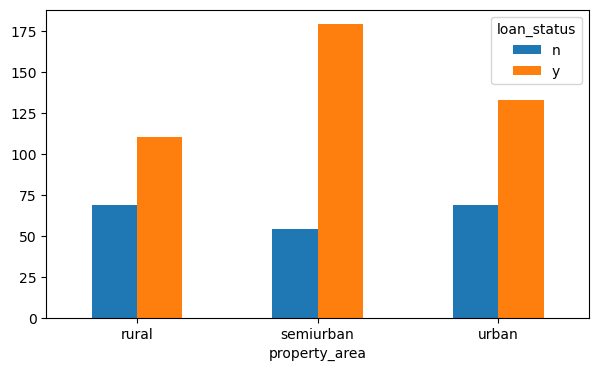

In [15]:
CrosstabResult=pd.crosstab(index=df['property_area'],columns=df['loan_status'])
print(CrosstabResult)
 
# Grouped bar chart between GENDER and APPROVE_LOAN
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

### 5. Encode the categorical data.

In [17]:
df.select_dtypes('object').columns

Index(['gender', 'married', 'education', 'self_employed', 'property_area',
       'loan_status'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes('object').columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])

In [19]:
df

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0.0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3.0,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1.0,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2.0,0,0,7583,0.0,187.0,360.0,1.0,2,1


### 6. Separate the target and independent features and split the data into train and test.

In [21]:
## Tranforming the data using minmax scaling approach so that the values range will be 1.
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

df.iloc[:,:] = mm.fit_transform(df.iloc[:,:])
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.172214,0.74359,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [22]:
X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


### 7. Build any classification model to predict the loan status of the customer and save your model using pickle. 

In [27]:
## Let us build simple random forest regressor model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [29]:
## Let us check the r2-score to see hows our model is performing
from sklearn.metrics import r2_score
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

print('r2-score train:',r2_train)
print('r2-score test',r2_test)

r2-score train: 0.8906635268912529
r2-score test 0.2098356014047409


In [30]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))


# ● Python Flask Application development

### 1. Creating a project and virtual environment using pycharm or visual studio code and installing the required packages

### 2. app.py